In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/danielsigge/Desktop/final project/vanguard-ab-test/df_final_demo.txt')
df1 = pd.read_csv('/Users/danielsigge/Desktop/final project/vanguard-ab-test/df_final_experiment_clients.txt')
#combine final web
df2 = pd.read_csv('/Users/danielsigge/Desktop/final project/vanguard-ab-test/df_final_web_data_pt_1.txt')
df3 = pd.read_csv('/Users/danielsigge/Desktop/final project/vanguard-ab-test/df_final_web_data_pt_2.txt')
combined_df23 = pd.concat([df2, df3], ignore_index=True)
#combined_df23.to_csv('combined_dataset.csv', index=False)

#data explorer
print(df.head())
print(df.info())
print(df.isnull().sum())
print(df.describe())


   client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  num_accts  \
0     836976             6.0              73.0      60.5     U        2.0   
1    2304905             7.0              94.0      58.0     U        2.0   
2    1439522             5.0              64.0      32.0     U        2.0   
3    1562045            16.0             198.0      49.0     M        2.0   
4    5126305            12.0             145.0      33.0     F        2.0   

         bal  calls_6_mnth  logons_6_mnth  
0   45105.30           6.0            9.0  
1  110860.30           6.0            9.0  
2   52467.79           6.0            9.0  
3   67454.65           3.0            6.0  
4  103671.75           0.0            3.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    7

In [45]:
summary_stats = df.describe()

# Extract mean, median, and standard deviation
avg = summary_stats.loc['mean']
median = df.median()
std_dev = summary_stats.loc['std']

# Print the results
print("Average (Mean):\n", avg)
print("\nMedian:\n", median)
print("\nStandard Deviation:\n", std_dev)

TypeError: Cannot convert [['N/A' 'N/A' 'N/A' ... 'F' 'M' 'F']] to numeric

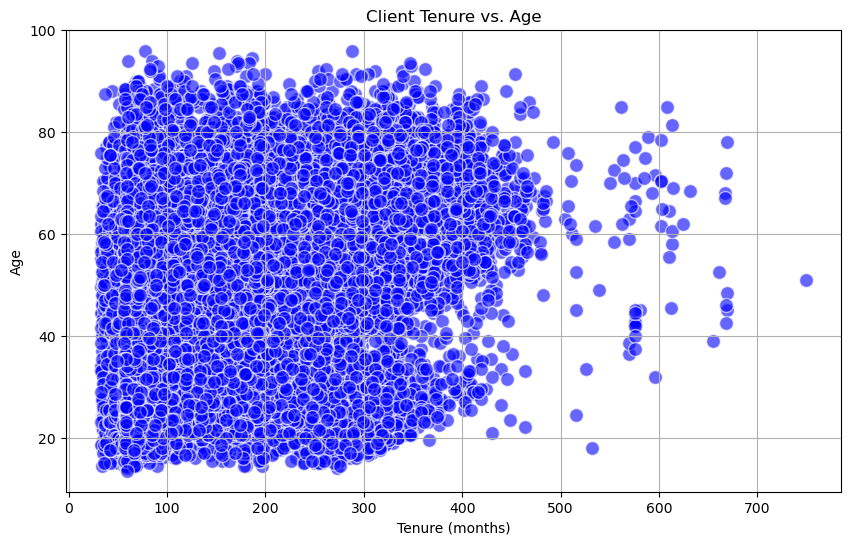

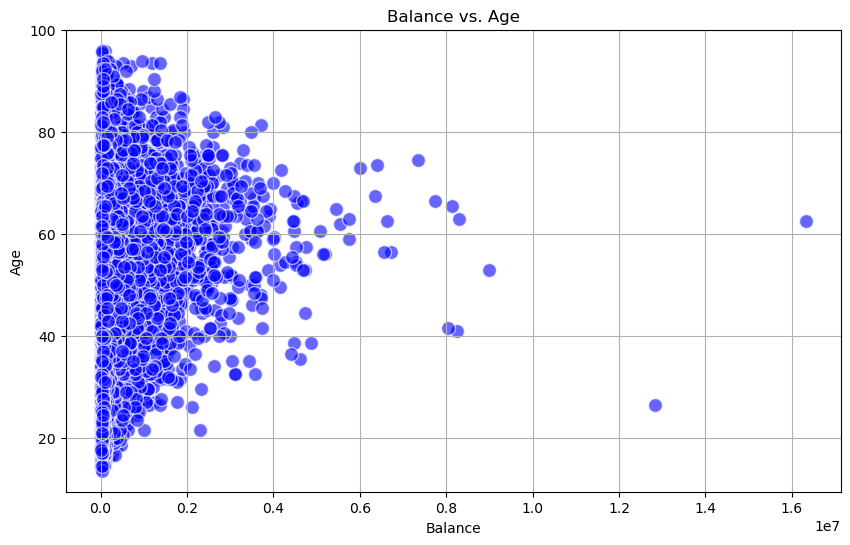

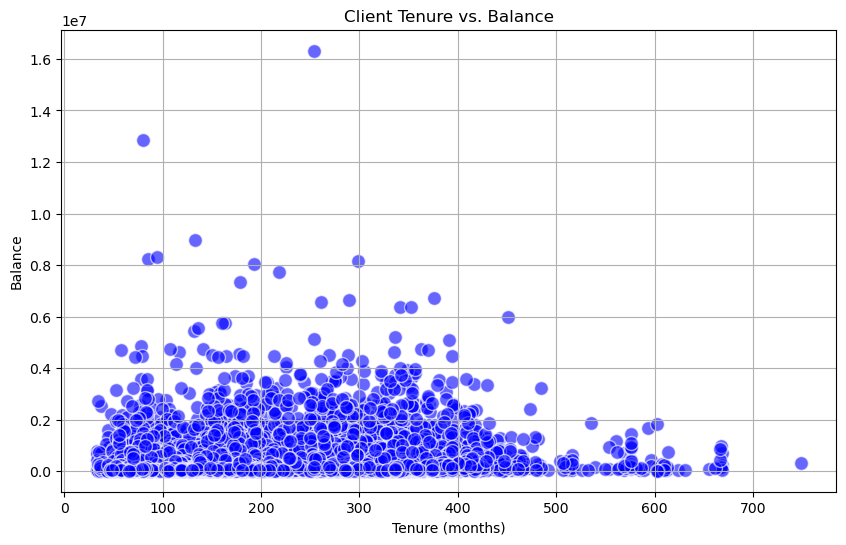

In [54]:
age = df['clnt_age']
tenure = df['clnt_tenure_mnth']
balance = df['bal']
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(tenure, age, alpha=0.6, c='blue', edgecolors='w', s=100)
plt.title('Client Tenure vs. Age')
plt.xlabel('Tenure (months)')
plt.ylabel('Age')
plt.grid(True)
plt.savefig('tenurebyage.png', transparent=True)
plt.show()

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(balance, age, alpha=0.6, c='blue', edgecolors='w', s=100)
plt.title('Balance vs. Age')
plt.xlabel('Balance')
plt.ylabel('Age')
plt.grid(True)
plt.savefig('balancebyage.png', transparent=True)
plt.show()

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(tenure, balance, alpha=0.6, c='blue', edgecolors='w', s=100)
plt.title('Client Tenure vs. Balance')
plt.xlabel('Tenure (months)')
plt.ylabel('Balance')
plt.grid(True)
plt.savefig('tenurebybalance.png', transparent=True)
plt.show()



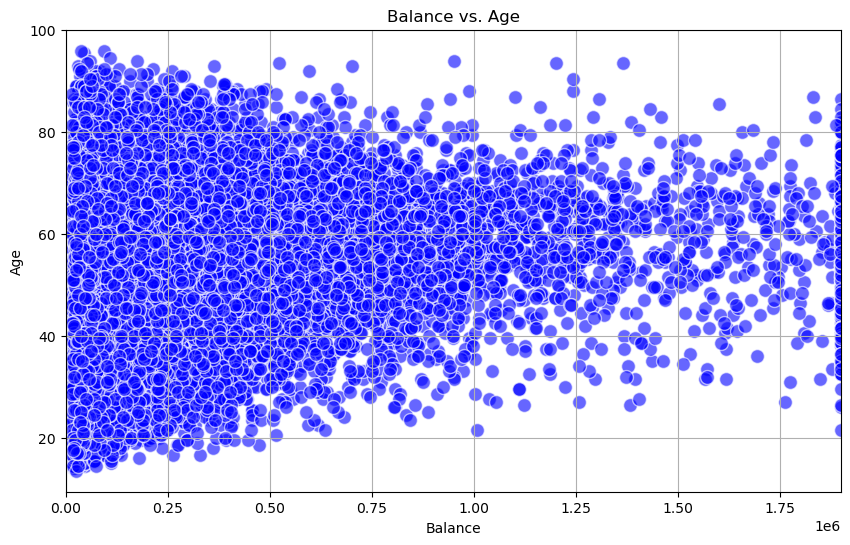

In [58]:
# Filter balance data to cap at 1 million
balance_capped = [b if b <= 1900000 else 1900000 for b in balance]

plt.figure(figsize=(10, 6))
plt.scatter(balance_capped, age, alpha=0.6, c='blue', edgecolors='w', s=100)

plt.title('Balance vs. Age')
plt.xlabel('Balance')
plt.ylabel('Age')
plt.grid(True)

# Set x-axis limits to ensure max is at 1 million
plt.xlim(0, 1900000)

# Save as image with transparent background
plt.savefig('balancebyage.png', transparent=True)

plt.show()

/var/folders/nf/7hyyw1vs3vl3k9n8sglqt3vc0000gn/T/ipykernel_5476/2768237678.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_balance_by_age_group = df.groupby('age_group')['bal'].mean()
/var/folders/nf/7hyyw1vs3vl3k9n8sglqt3vc0000gn/T/ipykernel_5476/2768237678.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_balance_by_age_group = df.groupby('age_group')['bal'].median()


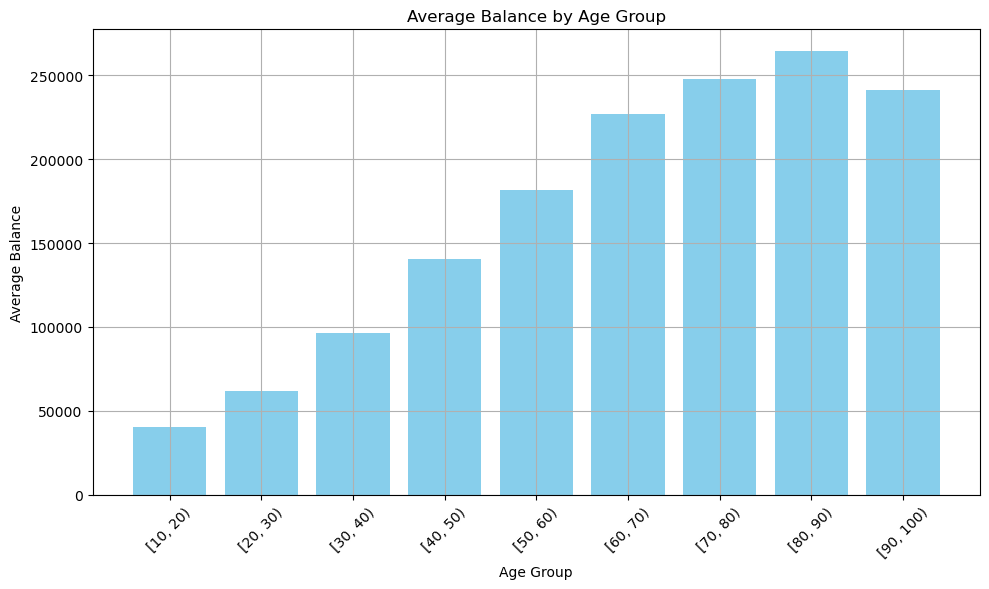

/var/folders/nf/7hyyw1vs3vl3k9n8sglqt3vc0000gn/T/ipykernel_5476/2768237678.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  range_balance_by_age_group = df.groupby('age_group')['bal'].agg(['min', 'max'])
/var/folders/nf/7hyyw1vs3vl3k9n8sglqt3vc0000gn/T/ipykernel_5476/2768237678.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_by_age_group = df.groupby('age_group')['bal'].agg(['min', 'max', 'mean'])


Age Group 1: [0, 10) years
   - Minimum Balance: nan
   - Average Balance: nan
   - Maximum Balance: nan

Age Group 2: [10, 20) years
   - Minimum Balance: 13793.69
   - Average Balance: 13793.69
   - Maximum Balance: 472893.29

Age Group 3: [20, 30) years
   - Minimum Balance: 13800.259999999998
   - Average Balance: 13800.259999999998
   - Maximum Balance: 12838418.01

Age Group 4: [30, 40) years
   - Minimum Balance: 13802.41
   - Average Balance: 13802.41
   - Maximum Balance: 4862430.04

Age Group 5: [40, 50) years
   - Minimum Balance: 13791.339999999997
   - Average Balance: 13791.339999999997
   - Maximum Balance: 8247729.97

Age Group 6: [50, 60) years
   - Minimum Balance: 13791.8
   - Average Balance: 13791.8
   - Maximum Balance: 8986419.77

Age Group 7: [60, 70) years
   - Minimum Balance: 13789.419999999998
   - Average Balance: 13789.419999999998
   - Maximum Balance: 16320040.15

Age Group 8: [70, 80) years
   - Minimum Balance: 13881.35
   - Average Balance: 13881.35
 

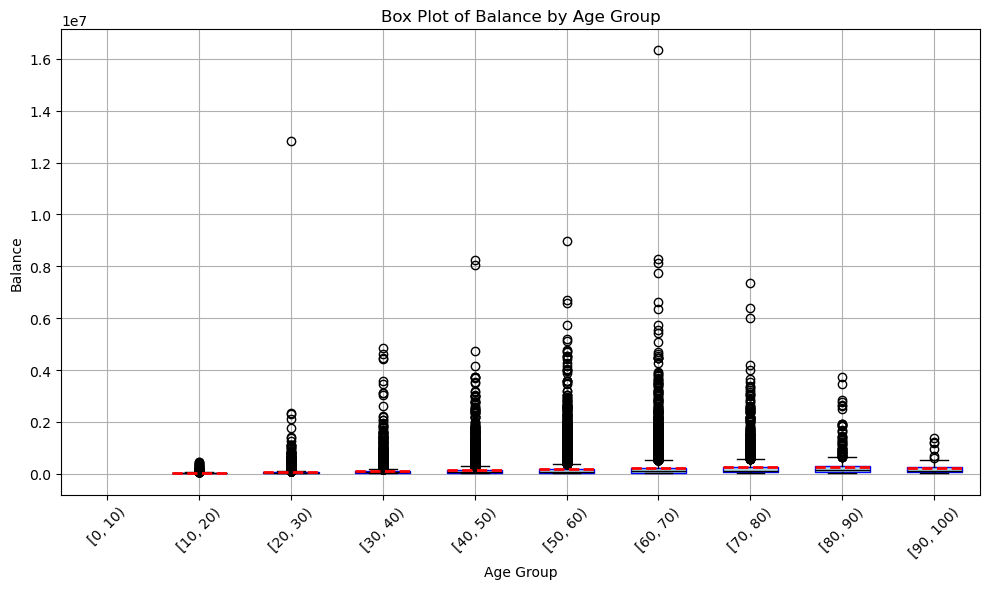

In [69]:
# Define age buckets
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Create age groups
df['age_group'] = pd.cut(df['clnt_age'], bins=age_bins, right=False)

# Calculate average balance by age group
avg_balance_by_age_group = df.groupby('age_group')['bal'].mean()
median_balance_by_age_group = df.groupby('age_group')['bal'].median()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(avg_balance_by_age_group.index.astype(str), avg_balance_by_age_group.values, color='skyblue')
plt.title('Average Balance by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Balance')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('balance by age.png', transparent=True)
plt.show()

# Calculate range (min and max balance) by age group
range_balance_by_age_group = df.groupby('age_group')['bal'].agg(['min', 'max'])

# Print the results
for idx, (age_group, row) in enumerate(range_balance_by_age_group.iterrows()):
    print(f"Age Group {idx+1}: {age_group} years")
    print(f"   - Minimum Balance: {row['min']}")
    print(f"   - Average Balance: {row['min']}")
    print(f"   - Maximum Balance: {row['max']}\n")
    
    
# Calculate statistics (min, max, mean) by age group
stats_by_age_group = df.groupby('age_group')['bal'].agg(['min', 'max', 'mean'])

# Plotting
plt.figure(figsize=(10, 6))

# Customizing box plot
boxprops = dict(facecolor='lightblue', color='blue')
whiskerprops = dict(color='black')
capprops = dict(color='black')
medianprops = dict(color='black')
meanlineprops = dict(color='red', linestyle='--', linewidth=2)

plt.boxplot(
    [df[df['age_group'] == age_group]['bal'] for age_group in stats_by_age_group.index],
    positions=range(1, len(stats_by_age_group) + 1),
    showmeans=True,
    meanline=True,
    patch_artist=True,
    boxprops=boxprops,
    whiskerprops=whiskerprops,
    capprops=capprops,
    medianprops=medianprops,
    meanprops=meanlineprops,
    widths=0.6
)

plt.xticks(range(1, len(stats_by_age_group) + 1), stats_by_age_group.index, rotation=45)
plt.title('Box Plot of Balance by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Balance')
plt.grid(True)
plt.tight_layout()
plt.show()




In [72]:

# Bucket by percentile (20% buckets)
df['tenure_bucket'] = pd.qcut(df['clnt_tenure_mnth'], q=[0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=False, precision=0)

# Calculate average balance by tenure bucket
avg_balance_by_tenure_bucket = df.groupby('tenure_bucket')['bal'].mean()

# Print results
print('Average Balance by Tenure Percentile Bucket:')
print(avg_balance_by_tenure_bucket)

Average Balance by Tenure Percentile Bucket:
tenure_bucket
0     90215.613012
1    113284.416608
2    128556.465338
3    148520.566071
4    257411.582362
Name: bal, dtype: float64


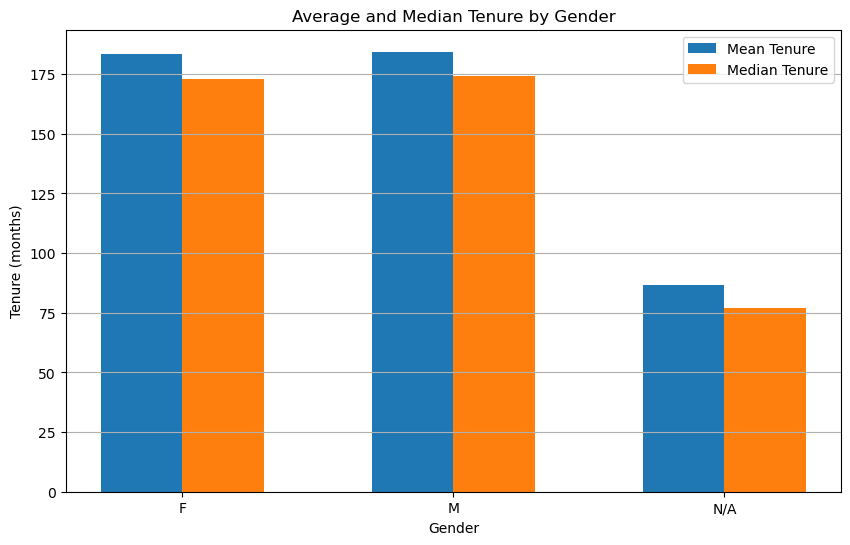

KeyError: 'age'

In [64]:
import numpy as np

# Calculate average and median tenure by sex
tenure_stats = df.groupby('gendr')['clnt_tenure_mnth'].agg(['mean', 'median'])

# Plotting
plt.figure(figsize=(10, 6))

# Bar width
bar_width = 0.3

# Positions of the bars
bar_positions = np.arange(len(tenure_stats.index))

# Average tenure bars
plt.bar(bar_positions - bar_width/2, tenure_stats['mean'], bar_width, label='Mean Tenure')

# Median tenure bars
plt.bar(bar_positions + bar_width/2, tenure_stats['median'], bar_width, label='Median Tenure')

# X-axis labels
plt.xticks(bar_positions, tenure_stats.index)

plt.title('Average and Median Tenure by Gender')
plt.xlabel('Gender')
plt.ylabel('Tenure (months)')
plt.legend()
plt.grid(axis='y')
plt.savefig('tenurebygender.png', transparent=True)
plt.show()




In [70]:

# Calculate overall average balance
overall_avg_balance = df['bal'].mean()

# Calculate average balance by gender
avg_balance_by_gender = df.groupby('gendr')['bal'].mean()

# Print results
print(f'Overall Average Balance: {overall_avg_balance}')
print('Average Balance by Gender:')
print(avg_balance_by_gender)

Overall Average Balance: 147446.72652817518
Average Balance by Gender:
gendr
F      135565.422432
M      212299.868067
N/A     94873.227328
Name: bal, dtype: float64


In [51]:
# Create histograms
df.hist(bins=50, figsize=(20, 15), layout=(int(df.shape[1]/4)+1, 4))

# Iterate through each subplot and save as image with transparent background
for i, col in enumerate(df.columns):
    plt.subplot(int(df.shape[1]/4)+1, 4, i+1)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.tight_layout()
    plt.savefig(f'{col}_histogram.png', transparent=True)
    plt.close()  # Close the figure to free up memory

# Show the plots
plt.show()

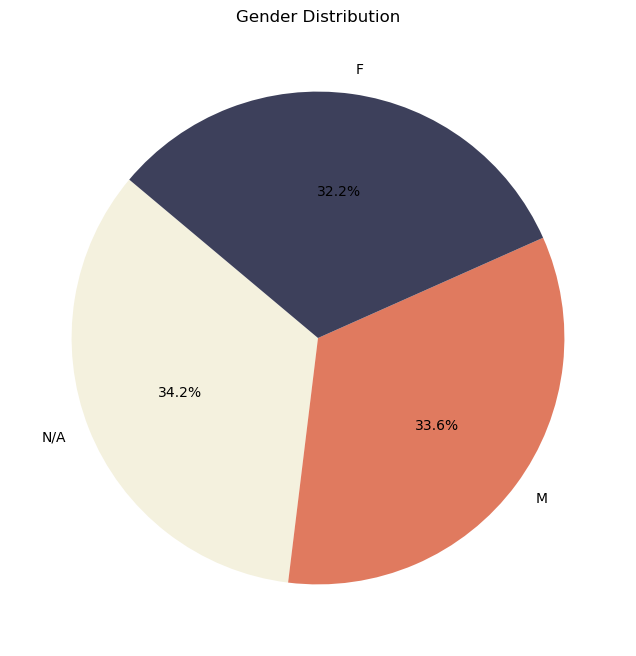

In [33]:
df['gendr'].replace('X', 'U', inplace=True)
df['gendr'].replace('U', 'N/A', inplace=True)

# Get value counts after replacement
gender_counts = df['gendr'].value_counts()

# Filter out categories with 0 count
gender_counts = gender_counts[gender_counts > 0]

# Define colors
colors = ['#f4f1de', '#e07a5f', '#3d405b']

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.savefig('gender_distribution.png', transparent=True)
plt.show()

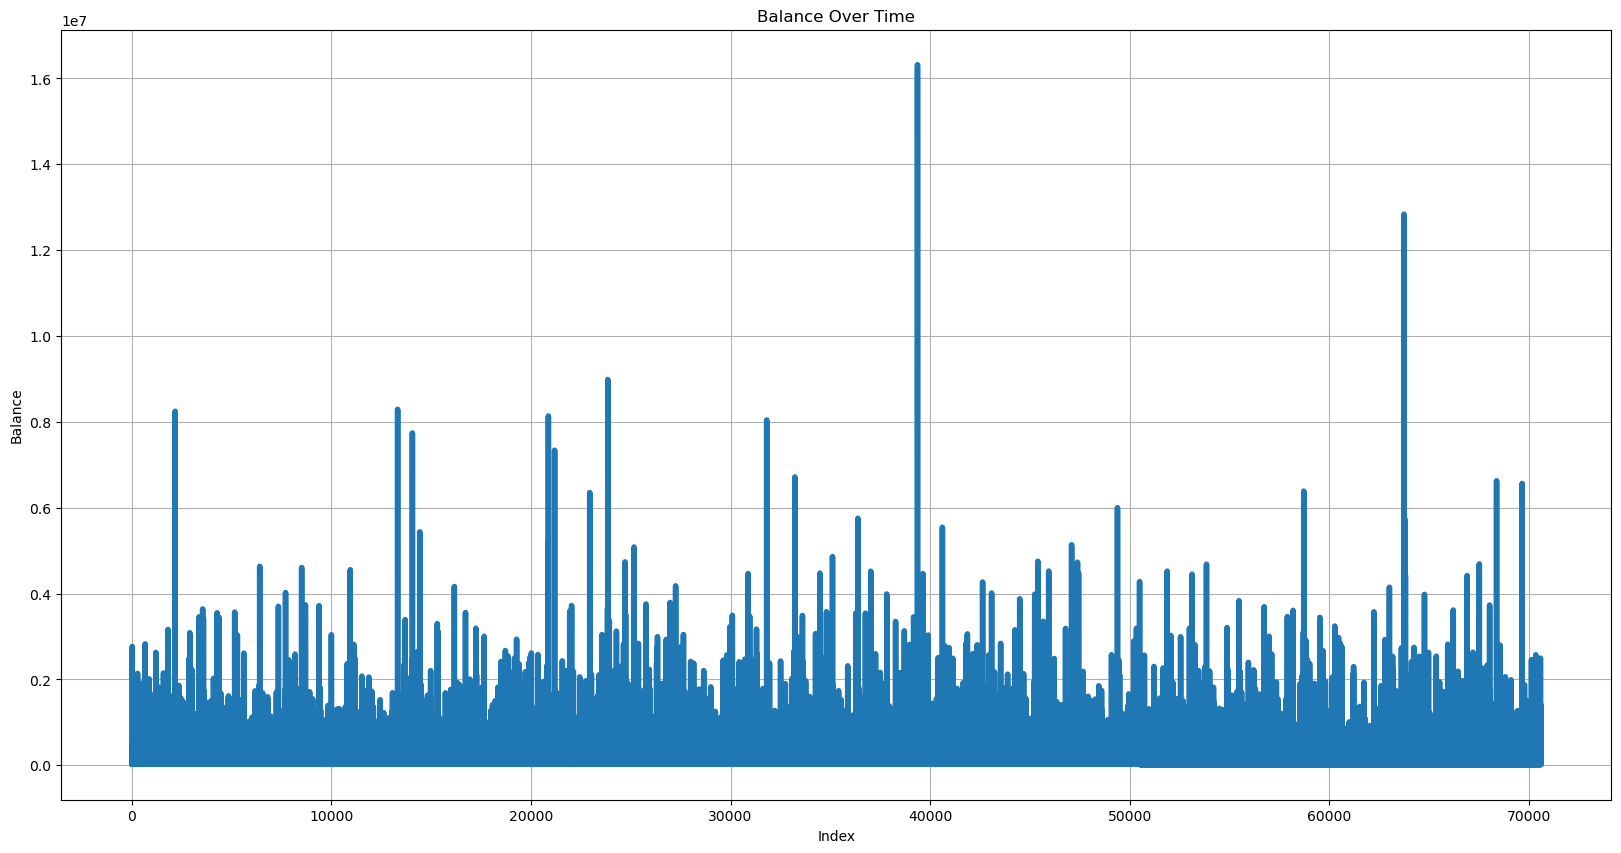

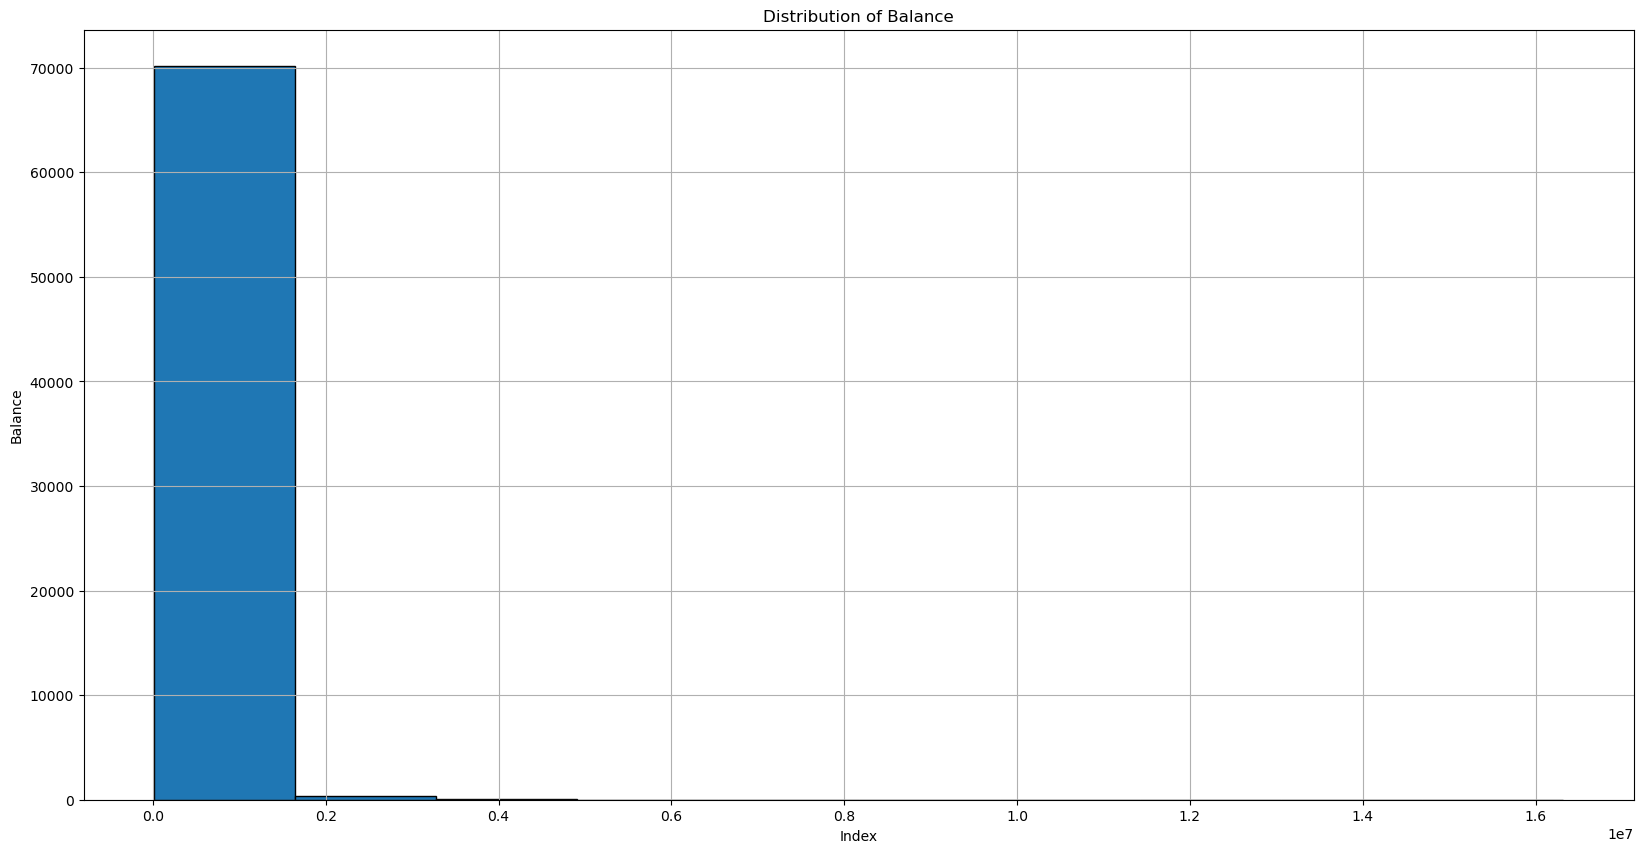

In [24]:
# Line chart for the "bal" column
plt.figure(figsize=(20, 10))
plt.plot(df['bal'], linewidth=4)
plt.title('Balance Over Time')
plt.xlabel('Index')
plt.ylabel('Balance')
plt.grid(True)
plt.show()

# Line chart for the "bal" column
plt.figure(figsize=(20, 10))
plt.hist(df['bal'], bins=10, edgecolor='black')  # Create histogram with 20 bins
plt.title('Distribution of Balance')
plt.xlabel('Index')
plt.ylabel('Balance')
plt.grid(True)
plt.show()

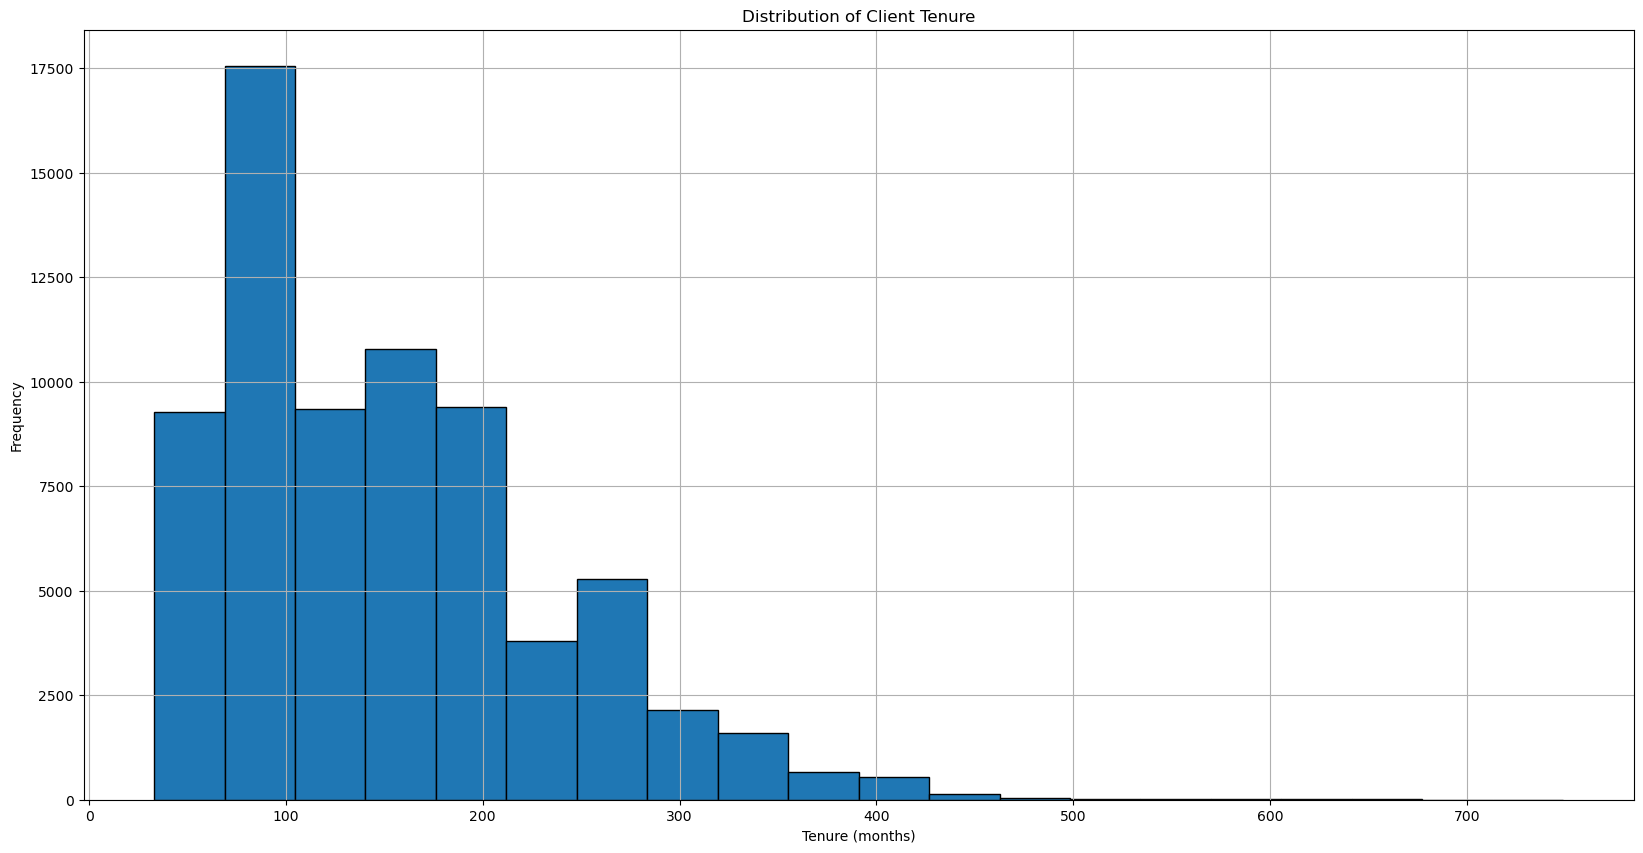

In [21]:
# Line chart for the "bal" column
plt.figure(figsize=(20, 10))
plt.hist(df['clnt_tenure_mnth'], bins=20, edgecolor='black')  # Create histogram with 20 bins
plt.title('Distribution of Client Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [50]:
# Calculate overall average and median age
overall_avg_age = df['clnt_age'].mean()
overall_median_age = df['clnt_age'].median()

# Split the data by gender
female_df = df[df['gendr'] == 'F']
male_df = df[df['gendr'] == 'M']
unknown_df = df[df['gendr'] == 'N/A']

# Calculate average and median age for females
female_avg_age = female_df['clnt_age'].mean()
female_median_age = female_df['clnt_age'].median()

# Calculate average and median age for males
male_avg_age = male_df['clnt_age'].mean()
male_median_age = male_df['clnt_age'].median()

# Calculate average and median age for males
unknown_avg_age = unknown_df['clnt_age'].mean()
unknown_median_age = unknown_df['clnt_age'].median()

# Print the results
print(f'Overall Average Age: {overall_avg_age}')
print(f'Overall Median Age: {overall_median_age}')
print(f'Female Average Age: {female_avg_age}')
print(f'Female Median Age: {female_median_age}')
print(f'Male Average Age: {male_avg_age}')
print(f'Male Median Age: {male_median_age}')
print(f'Unknown Average Age: {unknown_avg_age}')
print(f'Unknown Median Age: {unknown_median_age}')

overall_avg_tenure = df['clnt_tenure_mnth'].mean()
overall_median_tenure = df['clnt_tenure_mnth'].median()
# Calculate average and median age for females
female_avg_tenure = female_df['clnt_tenure_mnth'].mean()
female_median_tenure = female_df['clnt_tenure_mnth'].median()

# Calculate average and median age for males
male_avg_tenure = male_df['clnt_tenure_mnth'].mean()
male_median_tenure = male_df['clnt_tenure_mnth'].median()

# Calculate average and median age for males
unknown_avg_tenure = unknown_df['clnt_tenure_mnth'].mean()
unknown_median_tenure = unknown_df['clnt_tenure_mnth'].median()

print(f'Overall Client Mean Tenure: {overall_avg_tenure}')
print(f'Overall Client Median Tenure: {overall_median_tenure}')
print(f'Female Average Tenure: {female_avg_tenure}')
print(f'Female Median Tenure: {female_median_tenure}')
print(f'Male Average Tenure: {male_avg_tenure}')
print(f'Male Median Tenure: {male_median_tenure}')
print(f'Unknown Average Tenure: {unknown_avg_tenure}')
print(f'Unknown Median Tenure: {unknown_median_tenure}')

Overall Average Age: 46.442240133722414
Overall Median Age: 47.0
Female Average Age: 49.520949659265774
Female Median Age: 51.0
Male Average Age: 48.582363850952625
Male Median Age: 49.5
Unknown Average Age: 41.43508808290155
Unknown Median Age: 39.0
Overall Client Mean Tenure: 150.6599994333796
Overall Client Median Tenure: 136.0
Female Average Tenure: 183.42699494394373
Female Median Tenure: 173.0
Male Average Tenure: 184.36688585398753
Male Median Tenure: 174.0
Unknown Average Tenure: 86.62072538860103
Unknown Median Tenure: 77.0
